In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score, mean_absolute_error

%matplotlib inline

# Etot VS a

In [2]:
Etot_1 = pd.read_table("../DM_high_P/Etot", delimiter=" ", header=None)
Etot_high_P = pd.DataFrame({'a (A)' : [i/10 for i in range(30,41,1)], 'Etot (Ry)' : Etot_1[24].to_list(), 'Etot (eV/atom)' : [i*13.606/2 for i in Etot_1[24].to_list()]})
Etot_high_P

,a,Etot (Ry),Etot (eV/atom)
0,3.0,-36.453645,-247.994147
1,3.1,-36.608131,-249.045114
2,3.2,-36.719033,-249.799585
3,3.3,-36.794351,-250.311972
4,3.4,-36.840702,-250.627294
5,3.5,-36.863563,-250.782820
6,3.6,-36.867503,-250.809621
7,3.7,-36.856337,-250.733662
8,3.8,-36.833281,-250.576814
9,3.9,-36.801017,-250.357316


(-251.0, -247.5)

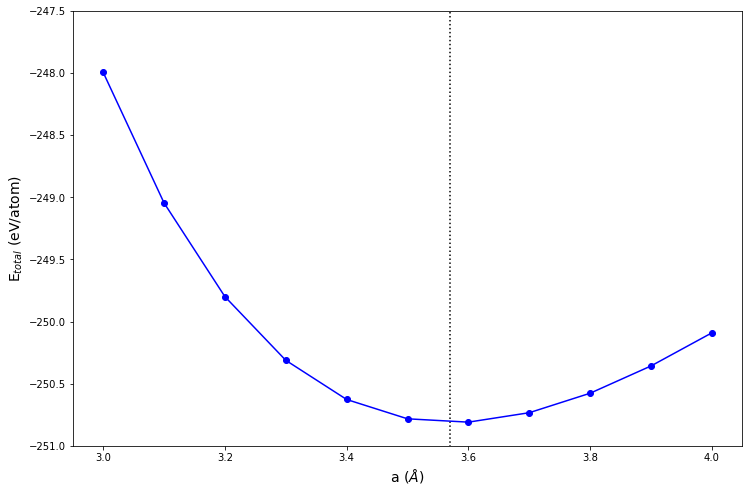

In [3]:
fig = plt.figure(figsize=(12,8))

plt.plot(Etot_high_P['a'],Etot_high_P["Etot (eV/atom)"],"bo-")
plt.xlabel('a ($\AA$)',size=14)
plt.ylabel('E$_{total}$ (eV/atom)',size=14)
plt.vlines(3.57,-252,-247,color='k',linestyles=':')

plt.ylim(-251,-247.5)

# Etot VS Volume

In [4]:
Etot_high_P.insert(1, "V (A^3/atom)", np.power(Etot_high_P["a"],3)/8, True)
Etot_high_P

,a,V (A^3/atom),Etot (Ry),Etot (eV/atom)
0,3.0,3.375000,-36.453645,-247.994147
1,3.1,3.723875,-36.608131,-249.045114
2,3.2,4.096000,-36.719033,-249.799585
3,3.3,4.492125,-36.794351,-250.311972
4,3.4,4.913000,-36.840702,-250.627294
5,3.5,5.359375,-36.863563,-250.782820
6,3.6,5.832000,-36.867503,-250.809621
7,3.7,6.331625,-36.856337,-250.733662
8,3.8,6.859000,-36.833281,-250.576814
9,3.9,7.414875,-36.801017,-250.357316


(-251.0, -247.5)

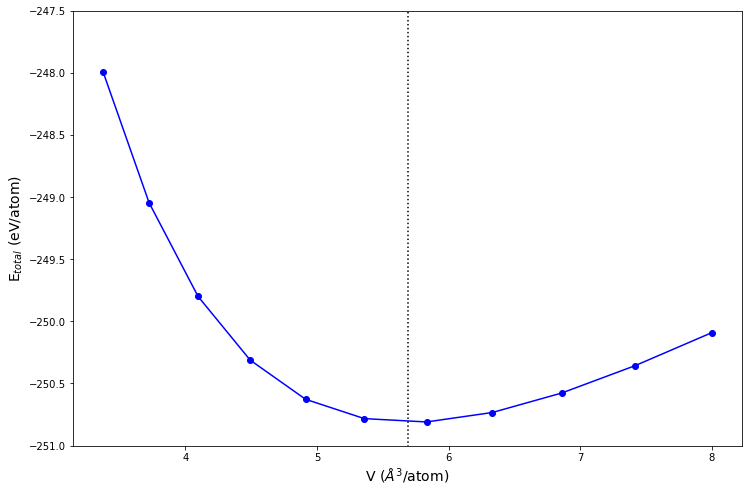

In [5]:
fig = plt.figure(figsize=(12,8))

plt.plot(Etot_high_P['V (A^3/atom)'],Etot_high_P["Etot (eV/atom)"],"bo-")
plt.xlabel('V ($\AA^3$/atom)',size=14)
plt.ylabel('E$_{total}$ (eV/atom)',size=14)
plt.vlines(np.power(3.57,3)/8,-252,-247,color='k',linestyles=':')

plt.ylim(-251,-247.5)

# Polynomial fitting

In [6]:
poly = np.poly1d(np.polyfit(Etot_high_P['V (A^3/atom)'], Etot_high_P["Etot (eV/atom)"], 5))
poly_line = np.linspace(3, 9, 100)
print(poly)
print('R2: ',r2_score(Etot_high_P["Etot (eV/atom)"], poly(Etot_high_P['V (A^3/atom)'])))
print('MAE: ',mean_absolute_error(Etot_high_P["Etot (eV/atom)"], poly(Etot_high_P['V (A^3/atom)']))*1000,'meV/atom')

           5          4         3         2
-0.003831 x + 0.1277 x - 1.727 x + 11.97 x - 42.5 x - 189.4
R2:  0.9999908018538878
MAE:  2.248432575121549 meV/atom


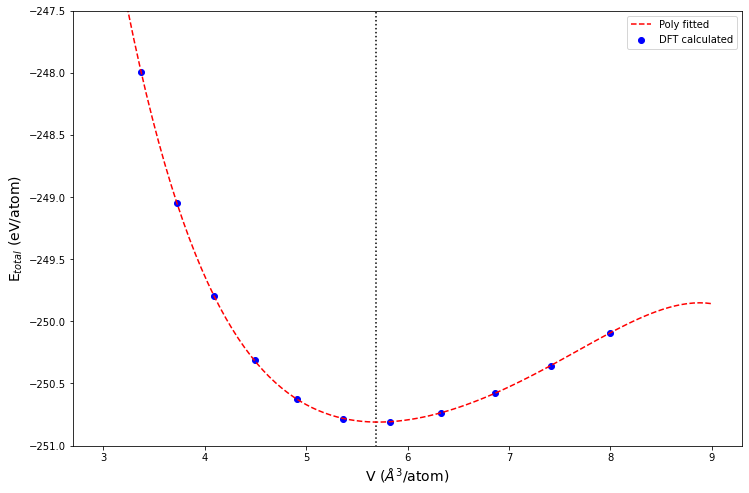

In [7]:
fig = plt.figure(figsize=(12,8))

plt.scatter(Etot_high_P['V (A^3/atom)'],Etot_high_P["Etot (eV/atom)"],color='b',label='DFT calculated')
plt.plot(poly_line,poly(poly_line),'r--',label='Poly fitted')
plt.xlabel('V ($\AA^3$/atom)',size=14)
plt.ylabel('E$_{total}$ (eV/atom)',size=14)
plt.vlines(np.power(3.57,3)/8,-252,-247,color='k',linestyles=':')

plt.ylim(-251,-247.5)
plt.legend()

# Pressure calculation

In [8]:
deriv_poly = [poly[i] * i for i in range(1, len(poly)+1)]
print(deriv_poly)

[-42.49634681139909, 23.94901382834091, -5.1819511023206895, 0.510623747912429, -0.01915468081121176]


In [9]:
def P_from_deriv_poly_eq(deriv_poly,V):
    return -(deriv_poly[0]+deriv_poly[1]*V+deriv_poly[2]*np.power(V,2)+deriv_poly[3]*np.power(V,3)+deriv_poly[4]*np.power(V,4))*1.602*np.power(10,2)

In [10]:
P_from_deriv_poly_eq(deriv_poly,Etot_high_P["V (A^3/atom)"])

0     568.588946
1     398.497544
2     262.994843
3     159.397547
4      83.416331
5      29.507383
6      -8.466346
7     -36.169882
8     -57.214623
9     -70.927546
10    -69.315271
Name: V (A^3/atom), dtype: float64

In [11]:
Etot_high_P.insert(4, "P (GPa)", P_from_deriv_poly_eq(deriv_poly,Etot_high_P["V (A^3/atom)"]), True)
Etot_high_P

,a,V (A^3/atom),Etot (Ry),Etot (eV/atom),P (GPa)
0,3.0,3.375000,-36.453645,-247.994147,568.588946
1,3.1,3.723875,-36.608131,-249.045114,398.497544
2,3.2,4.096000,-36.719033,-249.799585,262.994843
3,3.3,4.492125,-36.794351,-250.311972,159.397547
4,3.4,4.913000,-36.840702,-250.627294,83.416331
5,3.5,5.359375,-36.863563,-250.782820,29.507383
6,3.6,5.832000,-36.867503,-250.809621,-8.466346
7,3.7,6.331625,-36.856337,-250.733662,-36.169882
8,3.8,6.859000,-36.833281,-250.576814,-57.214623
9,3.9,7.414875,-36.801017,-250.357316,-70.927546


(3.0, 9.0)

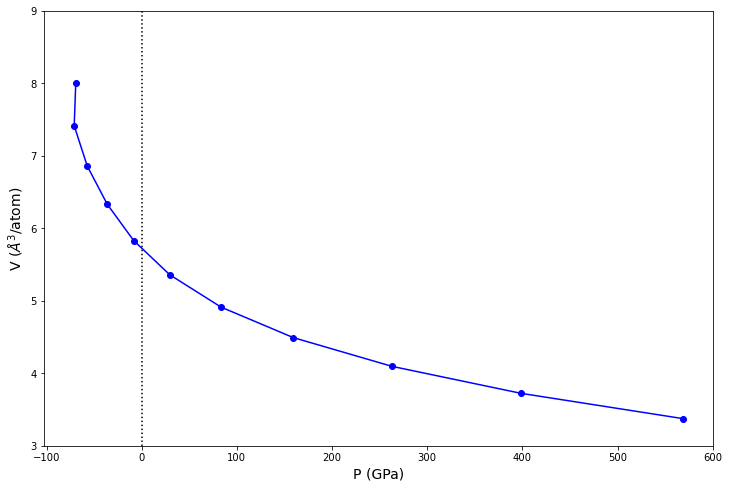

In [74]:
fig = plt.figure(figsize=(12,8))

plt.plot(P_from_deriv_poly_eq(deriv_poly,Etot_high_P["V (A^3/atom)"]),Etot_high_P["V (A^3/atom)"],'bo-')
plt.xlabel('P (GPa)',size=14)
plt.ylabel('V ($\AA^3$/atom)',size=14)
plt.vlines(0,3,9,color='k',linestyles=':')
plt.ylim(3,9)

# a parameter VS Pressure

(3.0, 4.0)

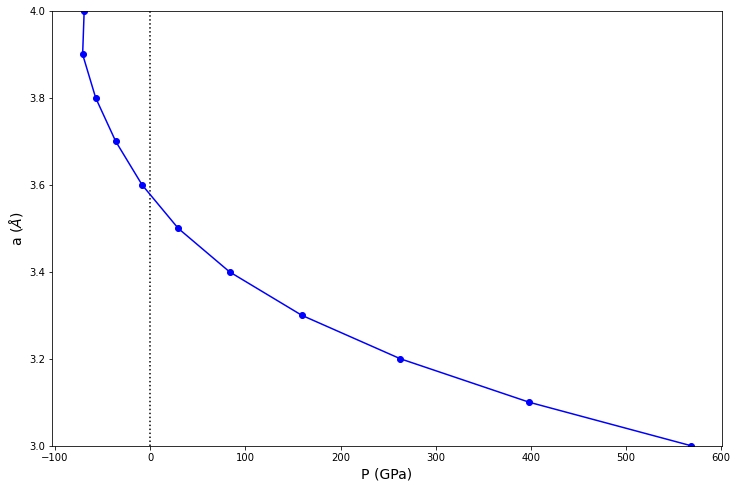

In [75]:
fig = plt.figure(figsize=(12,8))

plt.plot(P_from_deriv_poly_eq(deriv_poly,Etot_high_P["V (A^3/atom)"]),Etot_high_P["a"],'bo-')
plt.xlabel('P (GPa)',size=14)
plt.ylabel('a ($\AA$)',size=14)
plt.vlines(0,3,4,color='k',linestyles=':')
plt.ylim(3,4)

In [67]:
poly2 = np.poly1d(np.polyfit(Etot_high_P["P (GPa)"], Etot_high_P["a"], 5))
poly2_line = np.linspace(-50, 200, 26)
print(poly2)
print('R2: ',r2_score(Etot_high_P["a"], poly2(Etot_high_P['P (GPa)'])))
print('MAE: ',mean_absolute_error(Etot_high_P["a"], poly2(Etot_high_P['P (GPa)'])),'A')

            5             4             3             2
-1.678e-13 x + 2.224e-10 x - 1.033e-07 x + 2.152e-05 x - 0.003169 x + 3.564
R2:  0.9918442911576898
MAE:  0.018867434897401555 A


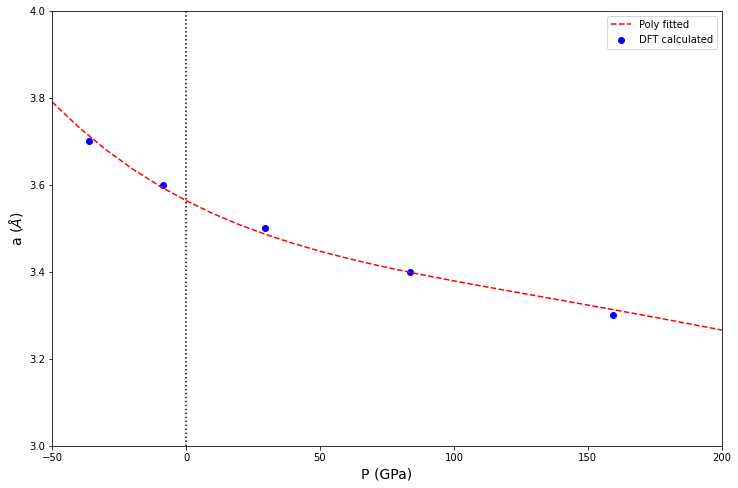

In [76]:
fig = plt.figure(figsize=(12,8))

plt.scatter(Etot_high_P['P (GPa)'],Etot_high_P["a"],color='b',label='DFT calculated')
plt.plot(poly2_line,poly2(poly2_line),'r--',label='Poly fitted')
plt.xlabel('P (GPa)',size=14)
plt.ylabel('a ($\AA$)',size=14)
plt.vlines(0,3,4,color='k',linestyles=':')
plt.xlim(-50,200)
plt.ylim(3,4)

plt.legend()

In [70]:
a_for_high_P = pd.DataFrame({'P (GPa)' : poly2_line, 'a (A)' : poly2(poly2_line)})
a_for_high_P

,P (GPa),a
0,-50.0,3.790323
1,-40.0,3.732102
2,-30.0,3.681119
3,-20.0,3.636554
4,-10.0,3.597649
5,0.0,3.563700
6,10.0,3.534060
7,20.0,3.508135
8,30.0,3.485382
9,40.0,3.465309
